In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


df_crimes = pd.read_csv("cleanup_Crime_Dataset.csv")
df_suspects = pd.read_csv("cleanup_suspects.csv")

Welche Monster begingen in der Vergangenheit ähnliche Verbrechen?

(Kidnapping, am Tag, mit Messer, im Dorf, Knochen zurückgelassen) mind 4/5 erfüllt

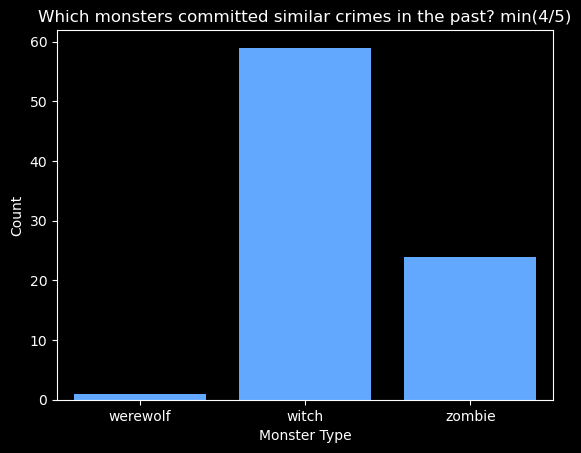

In [36]:
criteria = [
    df_crimes["Crime Weapon"] == "knife",
    df_crimes["Time of Day"] == "day",
    df_crimes["Region"] == "village",
    df_crimes["Crime Type"] == "kidnapping",
    df_crimes["Evidence Found"] == "bones"
]

df_very_similar_crime = df_crimes[sum(criteria) >= 4]

df_very_similar_crime = (
    df_very_similar_crime.groupby("Monster involved")["Index_Crimes"].count()
)
df_very_similar_crime.plot(kind="bar")

# Formatting
plt.style.use("dark_background")
bars = plt.bar(df_very_similar_crime.index, df_very_similar_crime.values, color="#62a8ff")
plt.xlabel("Monster Type", color="white")
plt.ylabel("Count", color="white")
plt.xticks(rotation=0, color="white")
plt.title("Which monsters committed similar crimes in the past? min(4/5)", color="white")
plt.show()

Welche Monster begingen in der Vergangenheit sehr ähnliche Verbrechen?

(Kidnapping, am Tag, mit Messer, im Dorf, Knochen zurückgelassen) 5/5 erfüllt

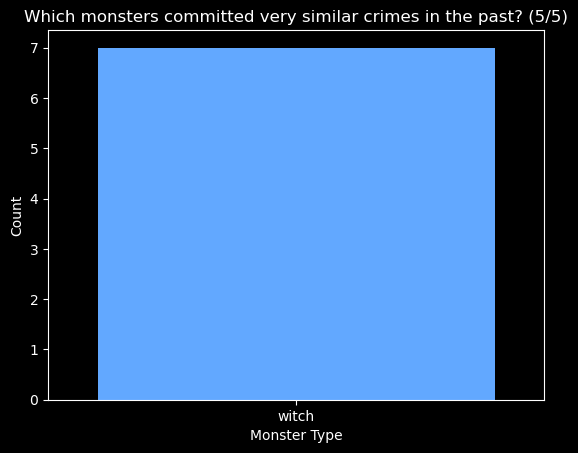

In [37]:
df_very_similar_crime = df_crimes.copy()
df_very_similar_crime = df_very_similar_crime[df_crimes['Crime Weapon'] == 'knife']
df_very_similar_crime = df_very_similar_crime[df_very_similar_crime['Time of Day'] == 'day']
df_very_similar_crime = df_very_similar_crime[df_very_similar_crime['Region'] == 'village']
df_very_similar_crime = df_very_similar_crime[df_very_similar_crime['Crime Type'] == 'kidnapping']
df_very_similar_crime = df_very_similar_crime[df_very_similar_crime['Evidence Found'] == 'bones']
df_very_similar_crime = df_very_similar_crime.groupby("Monster involved")["Index_Crimes"].count()
df_very_similar_crime.plot(kind='bar')

# Formatting:
plt.style.use("dark_background")
bars = plt.bar(df_very_similar_crime.index, df_very_similar_crime.values, color="#62a8ff")
plt.xlabel("Monster Type", color="white")
plt.ylabel("Count", color="white")
plt.xticks(rotation=0, color="white")
plt.title("Which monsters committed very similar crimes in the past? (5/5)", color="white")
plt.show()

Welche Monster begehen die meisten Straftaten ?

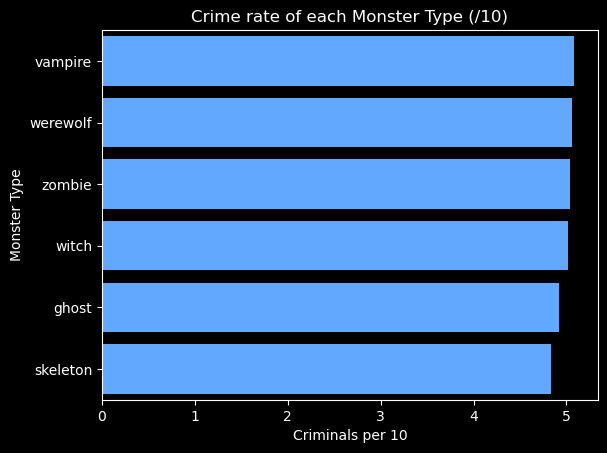

In [48]:
df_crime_rates = df_suspects.copy()
df_crime_rates = (
    df_crime_rates.groupby("Monster")["Criminal record"]
    .apply(lambda x: (x == 1).sum() / len(x) * 10)
    .sort_values(ascending=True)
)
df_crime_rates.plot(kind='barh')

# Formatting:
bars = plt.barh(df_crime_rates.index, df_crime_rates.values, color="#62a8ff")
plt.xlabel("Criminals per 10", color="white")
plt.ylabel("Monster Type", color="white")
plt.xticks(rotation=0, color="white")
plt.title("Crime rate of each Monster Type (/10)", color="white")
plt.show()

Welche Monster Typen sind am fähigsten Verbrechen zu begehen?

(Speed : Strength = 50 : 50)

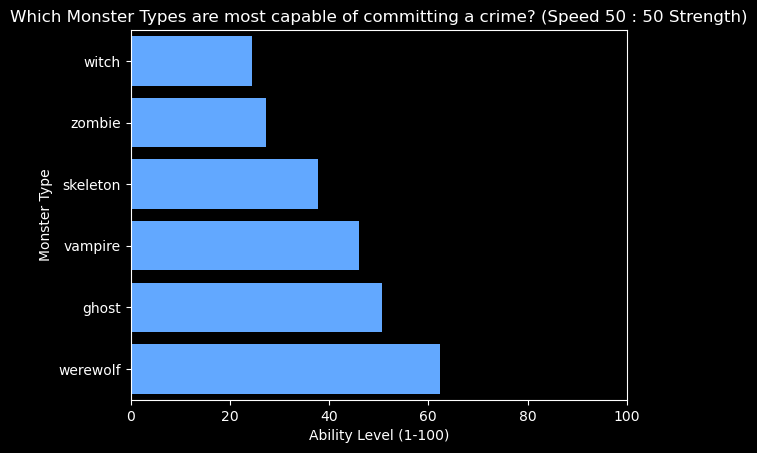

In [39]:
df_avg_ability = df_suspects.copy()

df_avg_ability["Strength_norm"] = (
    df_avg_ability["Strength Level"] - df_avg_ability["Strength Level"].min()
) / (df_avg_ability["Strength Level"].max() - df_avg_ability["Strength Level"].min())

df_avg_ability["Speed_norm"] = (
    df_avg_ability["Speed Level"] - df_avg_ability["Speed Level"].min()
) / (df_avg_ability["Speed Level"].max() - df_avg_ability["Speed Level"].min())

df_avg_ability["Ability Score"] = ((df_avg_ability["Strength_norm"] + df_avg_ability["Speed_norm"]) / 2) * 99 + 1

df_avg_ability = df_avg_ability.groupby('Monster')['Ability Score'].mean().sort_values(ascending=False)
df_avg_ability.plot(kind='barh')

# Formatting:
bars = plt.barh(df_avg_ability.index, df_avg_ability.values, color="#62a8ff")
plt.xlabel("Ability Level (1-100)", color="white")
plt.ylabel("Monster Type", color="white")
plt.xticks(rotation=0, color="white")
plt.title("Which Monster Types are most capable of committing a crime? (Speed 50 : 50 Strength)", color="white")
plt.xlim(0, 100)
plt.show()

Fähigkeit in Relation zu Häufigkeit pro Monster Typ

(Fähigkeit 50 : 50 Häufigkeit)

In [40]:
df_avg_ability_copy = df_avg_ability.copy()
df_avg_ability_copy = df_avg_ability_copy.reset_index()
df_avg_ability_copy.columns = ['Monster', 'Ability Score']

In [41]:
df_crime_rates_copy = df_crime_rates.copy()
df_crime_rates_copy = df_crime_rates_copy.reset_index()
df_crime_rates_copy.columns = ['Monster',"Crime Rate" ]

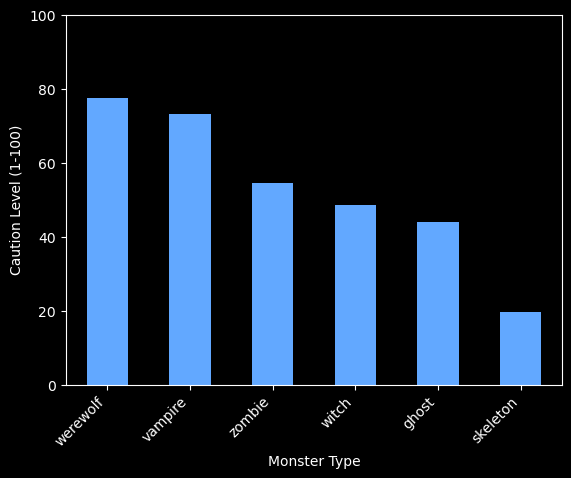

In [49]:
df_caution_level = df_suspects.merge(df_avg_ability, on="Monster", how="left")
df_caution_level = df_caution_level.merge(df_crime_rates, on="Monster", how="left")

df_caution_level["Crime_Level_norm"] = (
    df_caution_level["Criminal record_y"] - df_caution_level["Criminal record_y"].min()
) / (df_caution_level["Criminal record_y"].max() - df_caution_level["Criminal record_y"].min())

df_caution_level['ability_norm'] = df_caution_level['Ability Score'] / 100
 
df_caution_level["Caution_Level"] = ((df_caution_level["ability_norm"] + df_caution_level["Crime_Level_norm"]) / 2) * 99 + 1

df_caution_level = df_caution_level.groupby('Monster')[['Caution_Level']].mean().sort_values(by='Caution_Level', ascending=False)
df_caution_level.plot(kind='bar', color="#62a8ff")

# Formatting:
plt.style.use("dark_background")
plt.xlabel("Monster Type", color="white")
plt.ylabel("Caution Level (1-100)", color="white")
plt.xticks(rotation=45, color="white", ha='right')
plt.title("", color="white")
plt.legend().remove()
plt.ylim(0,100)
plt.show()

Boxplott zu Alter unter Verbrechern

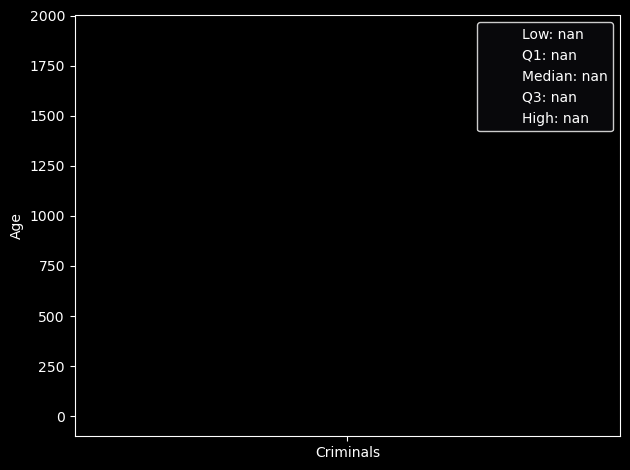

In [50]:
df_criminals = df_suspects.copy()
df_criminals = df_criminals[df_criminals['Criminal record'] == 'Yes']
age_plot = plt.boxplot(df_criminals["Age"])

df_criminals = df_suspects[df_suspects["Criminal record"] == "Yes"]

q1 = df_criminals["Age"].quantile(0.25)
median = df_criminals["Age"].median()
q3 = df_criminals["Age"].quantile(0.75)
low = df_criminals["Age"].min()
high = df_criminals["Age"].max()

labels = [
    f"Low: {low:.1f}",
    f"Q1: {q1:.1f}",
    f"Median: {median:.1f}",
    f"Q3: {q3:.1f}",
    f"High: {high:.1f}",
]
handles = [mpatches.Patch(color="none", label=lbl) for lbl in labels]
plt.legend(handles=handles, facecolor="#0b0b0f", edgecolor="white", labelcolor="white", loc="upper right")

plt.ylabel("Age", color="white")
plt.xticks([1], ["Criminals"], color="white")
plt.ylim(-100, 2000)
plt.tight_layout()
plt.show()


Ausschlusskriterien der Suspects (Allergien)

In [44]:
df_possible_criminals = df_suspects.copy()
df_possible_criminals = df_possible_criminals[df_possible_criminals['Allergy'] != 'sunlight']
df_possible_criminals = df_possible_criminals[df_possible_criminals['Age'] > 12]
df_possible_criminals

TypeError: '>' not supported between instances of 'str' and 'int'

Motivationen der Suspects (favorite food)

In [ ]:
df_suspects_with_motivation = df_suspects.copy()
df_suspects_with_motivation = df_suspects_with_motivation[df_suspects_with_motivation["Favorite Food"].isin(["brain", "humans"])]
df_suspects_with_motivation


,importtIndex_Monster,Monster,Criminal record,Age,Gender,Height in cm,Speed Level,Strength Level,Allergy,Favorite Food
0,2101,Witch,No,526.0,F,197.0,16.0,1.0,hazelnut,brain
1,9299,Zombie,Yes,46.0,M,184.0,20.0,7.0,cat hair,humans
3,6773,Vampire,No,551.0,F,167.0,43.0,6.0,garlic,humans
4,9624,Zombie,Yes,150.0,F,176.0,17.0,1.0,pumpkin,brain
7,9574,Skeleton,No,999.0,F,184.0,38.0,3.0,silver,brain
...,...,...,...,...,...,...,...,...,...,...
9959,3447,Witch,No,573.0,M,153.0,26.0,5.0,hazelnut,humans
9968,3166,Witch,No,431.0,F,193.0,16.0,6.0,hazelnut,brain
9971,9955,Zombie,Yes,86.0,F,158.0,21.0,3.0,sunlight,humans
9978,659,Vampire,Yes,521.0,M,165.0,54.0,1.0,garlic,humans
